In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [3]:
fraud=pd.read_csv('Fraud_check.csv')

In [4]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [5]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)


In [6]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass
  

In [8]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [9]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [11]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [12]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [13]:
model.n_outputs_

1

In [14]:
model.oob_score_

0.73125

In [15]:
prediction = model.predict(x_train)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [17]:
np.mean(prediction == y_train)

0.98125

In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [19]:
pred_test = model.predict(x_test)

In [20]:
acc_test =accuracy_score(y_test,pred_test)

In [21]:
!pip install Six

In [22]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [23]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.externals.six import StringIO

In [24]:
tree = model.estimators_[5]

In [25]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [26]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [27]:
graph.write_pdf('fraudrf.pdf')
graph.write_png('fraudrf.png')

True

In [28]:
fraud.corr()

,undergrad,marital,population,experience,urban,income
undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
marital,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


In [29]:
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


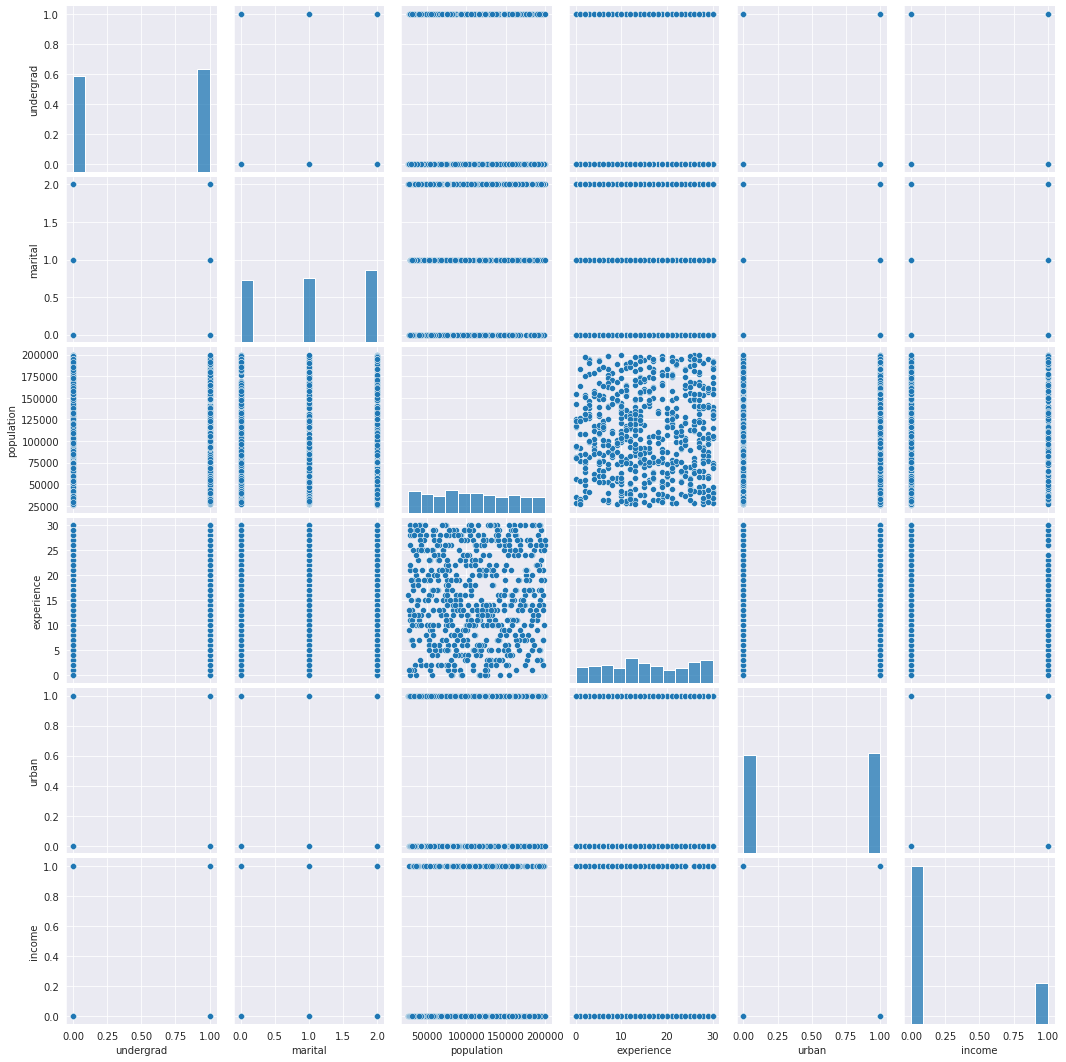

In [30]:
sns.set_style(style='darkgrid')
sns.pairplot(fraud)

In [31]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('	experience~undergrad+marital+population+urban+income',data=fraud).fit()

In [32]:
#Coefficients
model.params

Intercept     16.225932
undergrad     -0.111947
marital        0.044935
population     0.000002
urban         -1.668513
income        -0.034542
dtype: float64

In [33]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     14.738511
undergrad     -0.154352
marital        0.101964
population     0.240873
urban         -2.305199
income        -0.038754
dtype: float64 
 Intercept     3.970230e-42
undergrad     8.773849e-01
marital       9.188193e-01
population    8.097370e-01
urban         2.149921e-02
income        9.690994e-01
dtype: float64


In [34]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.009086455029848395, 0.0007454319240389751)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             experience   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.089
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.365
Time:                        18:12:33   Log-Likelihood:                -2155.8
No. Observations:                 600   AIC:                             4324.
Df Residuals:                     594   BIC:                             4350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2259      1.101     14.739      0.000      14.064      18.388
undergrad     -0.1119      0.725     -0.154      0.877      -1.536       1.312
marital        0.0449      0.441      0.102      0.919      -0.821       0.910
population  1.752e-06   7.27e-06      0.241      0.810   -1.25e-05     1.6e-05
urban         -1.6685      0.724     -2.305      0.021      -3.090      -0.247
income        -0.0345      0.891     -0.039      0.969      -1.785       1.716
==============================================================================
Omnibus:                      299.832   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.640
Skew:                           0.023   Prob(JB):                     4.96e-08
Kurtosis:                       1.841   Cond. No.                     3.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""